In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator
import scipy.linalg as la
import networkx as nx
import random, time, math
from collections import Counter

import fun as f
from Graph import Graph
from Watts_Strogatz import watts_strogatz_graph
from Erdos_Renyi import erdos_renyi_graph

## Watts Strogatz models:

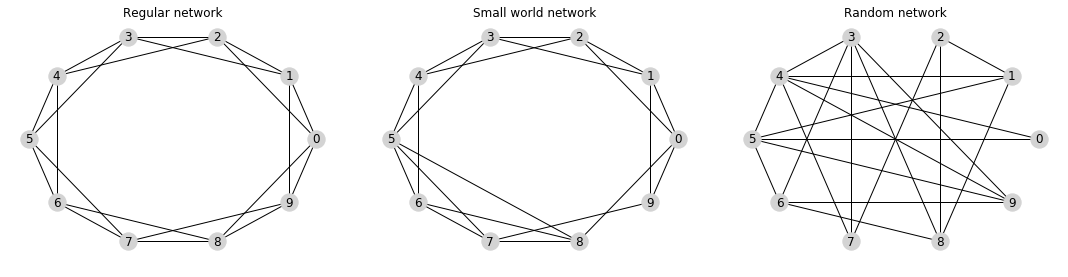

In [2]:
titles = ['Regular network','Small world network', 'Random network']
p = [0,0.1,1]
fig= plt.figure(figsize=(15, 4))
for i in range(3): 
    plt.subplot(1, 3, i+1)
    plt.tight_layout()
    G=nx.watts_strogatz_graph(10, 4, p[i], seed=1991)
    pos = nx.circular_layout(G) 
    nx.draw_networkx(G,pos, node_color='lightgrey')
    plt.axis('off')
    plt.title(titles[i]) 
    plt.xlabel('as')
#plt.savefig('01-Figures/WS-models')
plt.show()
    

## Small World property:

In [3]:
N = 1000
k = 10
g_0 = watts_strogatz_graph(N,k,0) 
C_0 = g_0.clustering_coefficient()
C_0

0.6666666666666636

In [4]:
p_list = [10 ** i for i in np.arange(-40, 1, 1) / 10]
replicates = 1
results_dict = {}
for p in p_list:
    temp = []
    for replicate in range(replicates):
        g = watts_strogatz_graph(N, k, p)
        temp.append(g.clustering_coefficient())
    results_dict[p] = temp

In [5]:
cc_list = [np.mean(results_dict[key]) / C_0 for key in results_dict]

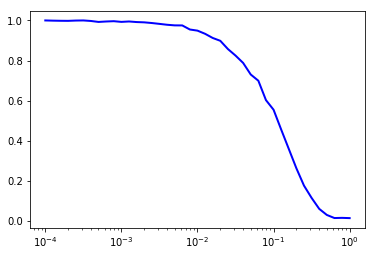

In [6]:
fig = plt.figure(figsize=(6, 4))
ax = plt.gca()
ax.plot(p_list, cc_list, color = 'blue', lw = 2)
ax.set_xscale('log')

## Spectral Graph Distance: Wattz Strogatz models

In [7]:
n = 25
k = 6
G_i = nx.watts_strogatz_graph(n, k, 0.1, seed = 1234)
G_j = nx.watts_strogatz_graph(n, k, 0.9, seed = 1234)

In [8]:
#Eigen-decomposition of G_i
A_Gi = (nx.adjacency_matrix(G_i)).todense()
D_i = np.diag(np.asarray(sum(A_Gi))[0])
eigenvalues_Gi, eigenvectors_Gi = la.eig(D_i - A_Gi)
r_eigenv_Gi = sorted(zip(eigenvalues_Gi.real, eigenvectors_Gi.T), key=lambda x: x[0])


#Eigen-decomposition of G_j
A_Gj = (nx.adjacency_matrix(G_j)).todense()
D_j = np.diag(np.asarray(sum(A_Gj))[0])
eigenvalues_Gj, eigenvectors_Gj = la.eig(D_j - A_Gj)
r_eigenv_Gj = sorted(zip(eigenvalues_Gj.real, eigenvectors_Gj.T), key=lambda x: x[0])


In [9]:
r = 4
signs =[-1,1]
temp = []
for  sign_s in signs:
    for sign_l in signs:
        vri = sorted(f.normalize_eigenv(sign_s * r_eigenv_Gi[r][1]))
        vrj = sorted(f.normalize_eigenv(sign_l * r_eigenv_Gj[r][1]))
        cdf_dist = f.cdf_dist(vri, vrj)
        temp.append(cdf_dist)
        print(f'|{sign_s} (z_i), {sign_l} (z_j)|, edf distance: {cdf_dist}')
print(f'min distance: {min(temp)}')

|-1 (z_i), -1 (z_j)|, edf distance: 0.16178538553770622
|-1 (z_i), 1 (z_j)|, edf distance: 0.05671590749169099
|1 (z_i), -1 (z_j)|, edf distance: 0.05671590749169098
|1 (z_i), 1 (z_j)|, edf distance: 0.16178538553770627
min distance: 0.05671590749169098


## Cumulative Density function distance of the eigenvectors

In [10]:
#Compute empirical CDF
step = 0.005
x=np.arange(0, 1, step)
cdf_grid_Gip = f.cdf(len(r_eigenv_Gi[r][1]),x,
                   f.normalize_eigenv(sorted(r_eigenv_Gi[r][1], key=lambda x: x)))
cdf_grid_Gin = f.cdf(len(r_eigenv_Gi[r][1]),x,
                   f.normalize_eigenv(sorted(-r_eigenv_Gi[r][1], key=lambda x: x)))

cdf_grid_Gjp = f.cdf(len(r_eigenv_Gj[r][1]),x,
                   f.normalize_eigenv(sorted(r_eigenv_Gj[r][1], key=lambda x: x)))
cdf_grid_Gjn = f.cdf(len(r_eigenv_Gj[r][1]),x,
                   f.normalize_eigenv(sorted(-r_eigenv_Gj[r][1], key=lambda x: x)))


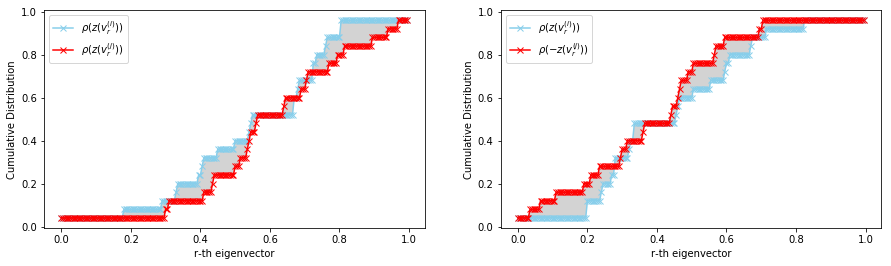

In [11]:
fig = plt.figure(figsize=(15, 4))
fig.tight_layout()
ax1 = plt.subplot(1, 2, 1)
ax1.plot(x, cdf_grid_Gin, '-x', color='skyblue', label = r'$\rho(z(v_r^{(i)}))$')
ax1.plot(x, cdf_grid_Gjp, '-x',color='red', label = r'$\rho(z(v_r^{(j)}))$')
ax1.fill(np.append(x, x[::-1]), 
           np.append(cdf_grid_Gjp, cdf_grid_Gin[::-1]),
           'lightgrey')
ax1.legend()
plt.xlabel ('r-th eigenvector')
plt.ylabel ('Cumulative Distribution')
ax2 = plt.subplot(1, 2, 2)
ax2.plot(x, cdf_grid_Gip, '-x', color='skyblue', label = r'$\rho(z(v_r^{(i)}))$')
ax2.plot(x, cdf_grid_Gjn,'-x', color='red', label = r'$\rho(- z(v_r^{(j)}))$')
ax2.fill(np.append(x, x[::-1]), 
           np.append(cdf_grid_Gip, cdf_grid_Gjn[::-1]),
           'lightgrey')
ax2.legend()
plt.xlabel ('r-th eigenvector')
plt.ylabel ('Cumulative Distribution')
#plt.savefig('01-Figures/eigen-distance_')
plt.show()

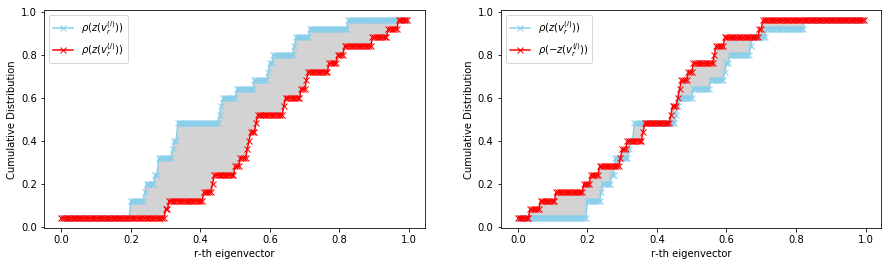

In [12]:
fig = plt.figure(figsize=(15, 4))
fig.tight_layout()
ax1 = plt.subplot(1, 2, 1)
ax1.plot(x, cdf_grid_Gip, '-x', color='skyblue', label = r'$\rho(z(v_r^{(i)}))$')
ax1.plot(x, cdf_grid_Gjp, '-x',color='red', label = r'$\rho(z(v_r^{(j)}))$')
ax1.fill(np.append(x, x[::-1]), 
           np.append(cdf_grid_Gjp, cdf_grid_Gip[::-1]),
           'lightgrey')
ax1.legend()
plt.xlabel ('r-th eigenvector')
plt.ylabel ('Cumulative Distribution')
ax2 = plt.subplot(1, 2, 2)
ax2.plot(x, cdf_grid_Gip, '-x', color='skyblue', label = r'$\rho(z(v_r^{(i)}))$')
ax2.plot(x, cdf_grid_Gjn,'-x', color='red', label = r'$\rho(- z(v_r^{(j)}))$')
ax2.fill(np.append(x, x[::-1]), 
           np.append(cdf_grid_Gip, cdf_grid_Gjn[::-1]),
           'lightgrey')
ax2.legend()
plt.xlabel ('r-th eigenvector')
plt.ylabel ('Cumulative Distribution')
#plt.savefig('01-Figures/eigen-distance')
plt.show()

# Erdos Renyi random models

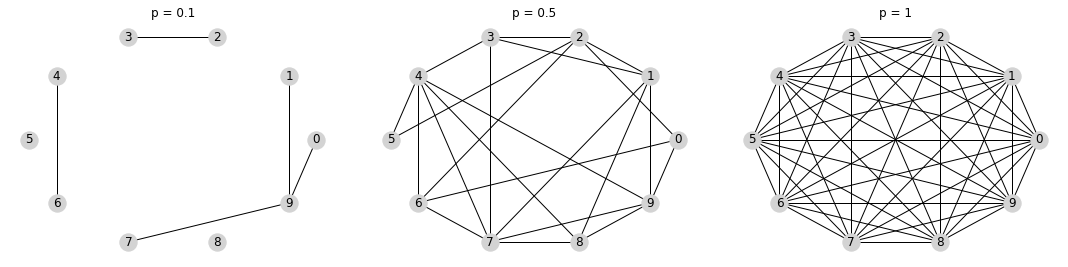

In [13]:
p = [0.1,0.5,1]
fig= plt.figure(figsize=(15, 4))
for i in range(3): 
    plt.subplot(1, 3, i+1)
    plt.tight_layout()
    G=nx.erdos_renyi_graph(10, p[i], seed=1991)
    pos = nx.circular_layout(G) 
    nx.draw_networkx(G,pos, node_color='lightgrey')
    plt.axis('off')
    plt.title('p = '+str(p[i]))  
#plt.savefig('01-Figures/ER-models')
plt.show()
    

## Find critical probability:

In [14]:
N = range(1, 300)
c = 2
critical_prob_func = [c * np.log(n) / n for n in N]

In [15]:
probabilities_ = np.arange(0, 1.01, 0.02).tolist()
replicates = 100
threshold = .95
models = {}
as_connected = {}
for n in N:
    for p in probabilities_:
        tempj = {}
        for r in range(replicates):
            g = erdos_renyi_graph(n, p)
            tempj[r] = g.ER.is_connected()
        ctr = Counter(tempj.values())
        if ctr[True]/replicates >= threshold:
            break
    as_connected[n] = p

In [16]:
n = 150
probabilities = np.linspace(0,1,100)
replicates = 100
tempi = {}
for p in probabilities:
    tempj = {}
    for r in range(replicates):
        g = erdos_renyi_graph(n, p)
        tempj[r] = g.ER.is_connected()
    ctr = Counter(tempj.values())
    tempi[p] = [ctr, ctr[True]/replicates]

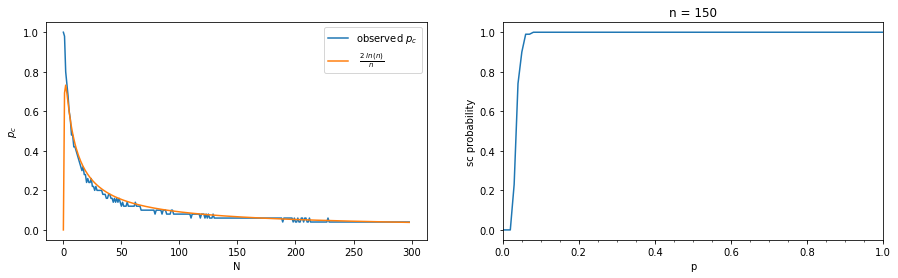

In [17]:
#Probability of having a single component for a ER model with 
# fixed n and different values of p.
fig, axs = plt.subplots(1,2,figsize=(15,4))

axs[0].plot(list(as_connected.values()), label = r'observed $p_c$')
axs[0].plot(critical_prob_func, label = r' $\frac{2 \ ln(n)}{n}$')
axs[0].set_xlabel('N')
axs[0].set_ylabel(r'$p_c$')
axs[0].legend()

axs[1].plot(probabilities, [list(tempi.values())[i][1]
                        for i in range(len(tempi.values()))])
axs[1].xaxis.set_major_locator(MultipleLocator(0.20))
axs[1].xaxis.set_minor_locator(MultipleLocator(0.05))
axs[1].set_xlim(0,1)
axs[1].set_xlabel('p')
axs[1].set_ylabel('sc probability')
axs[1].set_title(f'n = {n}')

plt.show()